In [1]:
import requests
from bs4 import BeautifulSoup
url = 'http://search.globaltimes.cn/QuickSearchCtrl?search_txt=climate+change'
header = {'User-Agent' : 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36'}#，'Referer' : 'http://www.chinadaily.com.cn/'}
response = requests.get(url, header)
soup = BeautifulSoup(response.text,'lxml')
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Search
  </title>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="images/gfavicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="images/gfavicon.ico" rel="bookmark" type="image/x-icon"/>
  <link href="images/gfavicon.ico" rel="icon" type="image/x-icon"/>
  <link href="bootstrap/css/bootstrap.css" rel="stylesheet" stype="text/css"/>
  <link href="bootstrap/css/bootstrap-responsive.min.css" rel="stylesheet" style="text/css"/>
  <link href="css/style.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <div class="row-fluid body-fluid">
   <div class="row-fluid header text-center">
    <a class="logo" href="http://www.globaltimes.cn/index.html">
     <img src="images/logo.png"

In [14]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

url_gt = 'http://search.globaltimes.cn/QuickSearchCtrl?search_txt=climate+change'
pages = []

driver = webdriver.Chrome()
driver.get(url_gt)
pages.append(driver.page_source)

btn_n = 2
btn_l = 1

for i in range(99):
    btn_next = driver.find_element_by_xpath('//a[@onclick="submitDL('+str(btn_n)+',100,'+str(btn_l)+');"]')
    btn_next.click()
    driver.implicitly_wait(3)
    time.sleep(3)
    pages.append(driver.page_source)
    btn_n = btn_n+1
    btn_l = btn_l+1

In [15]:
l = len(pages)
print(l)


100


In [18]:
pages[0]

'<html xmlns="http://www.w3.org/1999/xhtml"><head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<title>Search</title>\n\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n<link rel="shortcut icon" href="images/gfavicon.ico" type="image/x-icon">\n<link rel="bookmark" href="images/gfavicon.ico" type="image/x-icon">\n<link rel="icon" href="images/gfavicon.ico" type="image/x-icon">\n<link rel="stylesheet" stype="text/css" href="bootstrap/css/bootstrap.css">\n<link rel="stylesheet" style="text/css" href="bootstrap/css/bootstrap-responsive.min.css">\n<link rel="stylesheet" type="text/css" href="css/style.css">\n\n</head>\n\n<body>\n\n<div class="row-fluid body-fluid">\n\n    <div class="row-fluid header text-center"> \n        <a href="http://www.globaltimes.cn/index.html" class="logo"><img src="images/logo.png"></a> <br>\n        <a class="search-link" href="search.jsp">&gt;&gt;Advanced Search</a>\n    </div>\n    \n    <div class="row-fluid 

In [31]:
from bs4 import BeautifulSoup
import re

links = []
for page in pages:
    soup = BeautifulSoup(page,'html.parser')
    #print(soup)
    for link in soup.find_all('a', href=re.compile('content')):
        links.append(link.get('href'))

links = list(dict.fromkeys(links))  # eliminate duplicate links and maintain the order
print(len(links))

526


In [32]:
print(links)

['http://www.globaltimes.cn/content/1173624.shtml', 'http://www.globaltimes.cn/content/1173669.shtml', 'http://www.globaltimes.cn/content/1173682.shtml', 'http://www.globaltimes.cn/content/1173746.shtml', 'http://www.globaltimes.cn/content/1173567.shtml', 'http://www.globaltimes.cn/content/1173458.shtml', 'http://www.globaltimes.cn/content/1173464.shtml', 'http://www.globaltimes.cn/content/1173382.shtml', 'http://www.globaltimes.cn/content/1173205.shtml', 'http://www.globaltimes.cn/content/1173211.shtml', 'http://www.globaltimes.cn/content/1173216.shtml', 'http://www.globaltimes.cn/content/1173251.shtml', 'http://www.globaltimes.cn/content/1173274.shtml', 'http://www.globaltimes.cn/content/1173304.shtml', 'http://www.globaltimes.cn/content/1173305.shtml', 'http://www.globaltimes.cn/content/1173088.shtml', 'http://www.globaltimes.cn/content/1173120.shtml', 'http://www.globaltimes.cn/content/1173182.shtml', 'http://www.globaltimes.cn/content/1172980.shtml', 'http://www.globaltimes.cn/con

In [44]:
# output the links to store:
with open('GT_quicksearch_links.txt', 'w') as file:
    file.write('\n'.join(links))

In [35]:
# get the html from the links:
import requests

header = {'User-Agent' : 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36'}#，'Referer' : 'http://www.chinadaily.com.cn/'}
response = requests.get(links[0], header)
soup = BeautifulSoup(response.text,'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   403 Forbidden
  </title>
 </head>
 <body>
  <center>
   <h1>
    403 Forbidden
   </h1>
  </center>
  <hr/>
  <center>
   openresty+
  </center>
 </body>
</html>



In [95]:
# if links are not in the memory
links = []
with open('GT_quicksearch_links.txt') as file:
    for line in file:
        line = line.strip()
        links.append(line)
print(len(links))

526


In [97]:
import time

news = []
driver = webdriver.Chrome()
for link in links:
    driver.get(link)
    news.append(driver.page_source)
    time.sleep(1.5)

WebDriverException: Message: unknown error: session deleted because of page crash
from unknown error: cannot determine loading status
from tab crashed
  (Session info: chrome=79.0.3945.88)


<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script async="" src="https://api.globaltimes.cn/api/WeChat?url=http%3A%2F%2Fwww.globaltimes.cn%2Fcontent%2F1173624.shtml&amp;callback=tt&amp;_=1576662000800">
  </script>
  <script async="async" charset="UTF-8" src="https://cdn.taboola.com/libtrc/userx.20191216-24-RELEASE.es6.js" type="text/javascript">
  </script>
  <script async="async" charset="UTF-8" src="https://cdn.taboola.com/libtrc/feed-card-placeholder.20191216-24-RELEASE.es6.js" type="text/javascript">
  </script>
  <script src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fwww.globaltimes.cn%2Fcontent%2F1173624.shtml&amp;callback=_ate.cbs.sc_httpwwwglobaltimescncontent1173624shtml0" type="text/javascript">
  </script>
  <script src="//m.addthis.com/live/red_lojson/300lo.json?si=5df9f3f07700b2bd&amp;bkl=0&amp;bl=1&amp;pdt=80&amp;sid=5df9f3f07700b2bd&amp;pub=ra-4dff17840be5fcb8&amp;rev=v8.1.0a-wp&amp;ln=zh&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.globaltimes.cn&
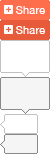
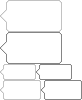

In [39]:
# soup = BeautifulSoup(news[0],'html.parser')
# print(soup.prettify())

In [146]:
len(news)

526

In [99]:
# rememdy for possible crashes:
driver = webdriver.Chrome()
for i in range(400, len(links)):
    driver.get(links[i])
    news.append(driver.page_source)
    time.sleep(1.5)

'<html xmlns="http://www.w3.org/1999/xhtml"><head><script async="" src="https://api.globaltimes.cn/api/WeChat?url=http%3A%2F%2Fwww.globaltimes.cn%2Fcontent%2F1171979.shtml&amp;callback=tt&amp;_=1577018771164"></script><script type="text/javascript" src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fwww.globaltimes.cn%2Fcontent%2F1171979.shtml&amp;callback=_ate.cbs.sc_httpwwwglobaltimescncontent1171979shtml0"></script><script charset="UTF-8" type="text/javascript" async="async" src="https://cdn.taboola.com/libtrc/userx.20191219-34-RELEASE.es6.js"></script><script charset="UTF-8" type="text/javascript" async="async" src="https://cdn.taboola.com/libtrc/feed-card-placeholder.20191219-34-RELEASE.es6.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script charset="UTF-8" type="text/javascript" src="https://cdn.taboola.com/libtrc/impl.20191219-34-RELEASE.js"></script><script type="text/javascript" src="//m.addthis.com/live/red_lojson/300lo.j
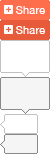
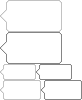

In [145]:
news.pop(526)  # duplicate

In [43]:
# with open('GT_quicksearch_news.txt', 'w') as file:
#     file.write('\n'.join(news))

<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script async="" src="https://api.globaltimes.cn/api/WeChat?url=http%3A%2F%2Fwww.globaltimes.cn%2Fcontent%2F1173624.shtml&amp;callback=tt&amp;_=1577005545285">
  </script>
  <script src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fwww.globaltimes.cn%2Fcontent%2F1173624.shtml&amp;callback=_ate.cbs.sc_httpwwwglobaltimescncontent1173624shtml0" type="text/javascript">
  </script>
  <script async="async" charset="UTF-8" src="https://cdn.taboola.com/libtrc/feed-card-placeholder.20191219-34-RELEASE.es6.js" type="text/javascript">
  </script>
  <script async="async" charset="UTF-8" src="https://cdn.taboola.com/libtrc/userx.20191219-34-RELEASE.es6.js" type="text/javascript">
  </script>
  <script async="" src="https://sb.scorecardresearch.com/beacon.js">
  </script>
  <script charset="UTF-8" src="https://cdn.taboola.com/libtrc/impl.20191219-34-RELEASE.js" type="text/javascript">
  </script>
  <script src="//m.addthis.com/live/r
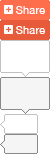
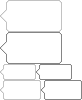

In [1]:
# import time
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# from bs4 import BeautifulSoup
# import re

# driver = webdriver.Chrome()
# driver.get('http://www.globaltimes.cn/content/1173624.shtml')
# sample = driver.page_source
# soup = BeautifulSoup(sample,'html.parser')
# print(soup.prettify())

In [114]:
# create a pandas dataframe including title, source, publish time, content, sector, link, media
import pandas as pd

gt = pd.DataFrame(columns=['title', 'source', 'timestamp', 'content', 'sector', 'media', 'link'])
gt

,title,source,timestamp,content,sector,media,link


In [177]:
problems = []  # collect the index that have problems
for i in range(len(news)):
    entry = []
    soup = BeautifulSoup(news[i], 'html.parser')
    
    #title
    title = soup.find('h3').get_text().strip()
    # print(title)
    entry.append(title)

    # source
    # source = soup.find(re.compile('Source'))  # this only look for tags
    sign = soup.find('div', text=re.compile('Source:'))  # add the text parameter
    source = re.findall(r'Source\:([\d\w\s\-\.\']+)\sPublished', str(sign))  # there might be '-' inside
    # print(source)
    if source != []:
        entry.append(source[0].strip())
    else:
        entry.append(None)
        print("source for "+str(i)+" not found")
        problems.append(i)

    # timestamp
    timestamp = re.findall(r'Published:\s?([0-9\/\:\s\w]+)\s\<', str(sign))
    # print(timestamp)
    if timestamp != []:
        entry.append(timestamp[0].split('Last')[0].strip())  # if there is 'Last Updated', delete the latter part
    else:
        entry.append(None)
        print("timestamp for "+str(i)+" not found")
        problems.append(i)

    # content
    content = soup.find('body').find('div', {'class':'span12 row-content'}).get_text()  # this way it includes the
    # comments under the photos, and related article headings
    content = content.split('RELATED ARTICLES:')[0].strip()  # delete the related article headings
    #print(content)
    if content == '' or content is None:
        entry.append(None)
        print("content for "+str(i)+" not found")
        problems.append(i)
    elif re.search(r'\#trump\_main\_unique', content):
        entry.append(None)
        print('content for '+str(i)+' might be a video')
    else:  # content is not None:
        entry.append(content)

    # sector
    sector = soup.find('body').find('div', {'id':'breadcrumbs'}).find('a').get_text().strip()
    # print(sector)
    if sector is not None:
        entry.append(sector)
    else:
        entry.append(None)
        print("sector for "+str(i)+" not found")
        problems.append(i)

    # media
    entry.append('Global Times')

    # link
    entry.append(links[i])

    #print(entry)

    gt.loc[i] = entry

content for17might be a video
content for174might be a video
content for259might be a video


In [183]:
# ******* to solve the problems ********
print(problems)
# first round problems exists at these index:
# [34, 88, 90, 137, 141, 159, 174, 182, 190, 215, 285, 287, 292, 310, 316, 332, 350, 519, 523]

# second round
# [174, 190, 310, 316, 350, 519, 523] (all for source)
driver = webdriver.Chrome()
driver.get(links[461])
#news.append(driver.page_source)
#time.sleep(1.5)

# conclusions:
# There could be a Last Updated: after the publish time
# There is Global Times - Xinhua as source
# There is globaltimes.cn as source
# There is People's Daily as source


# problems for content:
# index: 17,174,259
# the three are videos, not text; so they are supposed to remove from the df/ or
# set there content as None(since headlines exists)

[]


In [164]:
print(problems)

[]


In [144]:
# fixing a bug:
# soup = BeautifulSoup(news[526], 'html.parser')
# #print(soup.prettify())
# title = soup.find('h3').get_text().strip()
# print(title)
# timestamp = re.findall(r'Published:\s?([0-9\/\:\s]+)\sLast', str(sign))
# print(timestamp)

Oxfam: Poor nations pay price as people escape from 'climate chaos'
['2019/12/2 19:08:40']


In [178]:
gt

,title,source,timestamp,content,sector,media,link
0,UN climate talks wrap up after long extension,Xinhua,2019/12/16 9:00:08,A staff waters plants during the United Nation...,WORLD,Global Times,http://www.globaltimes.cn/content/1173624.shtml
1,China-EU relations standing at new historical ...,Xinhua,2019/12/16 14:49:22,Photo: Xinhua The China-European Union (EU) re...,CHINA,Global Times,http://www.globaltimes.cn/content/1173669.shtml
2,"Wong, Thunberg engage in ‘dangerous PR stunt’",Global Times,2019/12/16 16:26:11,A journalist films two young leaders of violen...,CHINA,Global Times,http://www.globaltimes.cn/content/1173682.shtml
3,"China, EU partners rather than competitors: Ch...",Global Times,2019/12/16 21:43:41,Chinese State Councilor and Foreign Minister W...,WORLD,Global Times,http://www.globaltimes.cn/content/1173746.shtml
4,Cultural cooperation plays essential role in C...,Global Times,2019/12/15 19:03:39,"Lina Mendoni, Greek Minister of Culture and Sp...",WORLD,Global Times,http://www.globaltimes.cn/content/1173567.shtml
...,...,...,...,...,...,...,...
521,"Xi's upcoming visits to Italy, Monaco, France ...",Xinhua,2019/3/20 16:47:32,Chinese President Xi Jinping's upcoming visits...,CHINA,Global Times,http://www.globaltimes.cn/content/1142790.shtml
522,Lancang-Mekong Cooperation offers opportunitie...,Xinhua,2019/3/19 9:09:06,Guests and experts pose for photos during a se...,CHINA,Global Times,http://www.globaltimes.cn/content/1142590.shtml
523,Russia Could Be World’s Largest Natural Gas Pr...,sputniknews.com,2019/3/19 18:16:45,Russia could become the largest natural gas pr...,WORLD,Global Times,http://www.globaltimes.cn/content/1142656.shtml
524,Cooperation trumps competition between China a...,Global Times,2019/3/19 20:58:29,"Vikram Misri, Indian Ambassador to China Photo...",WORLD,Global Times,http://www.globaltimes.cn/content/1142705.shtml


In [179]:
gt.to_csv('GT_df.csv', sep='\t')
# brief: 526 articles/headlines, 523 content (3 are videos)

In [180]:
gt_test = pd.read_csv('GT_df.csv', sep='\t', header=0, index_col=0)
gt_test

,title,source,timestamp,content,sector,media,link
0,UN climate talks wrap up after long extension,Xinhua,2019/12/16 9:00:08,A staff waters plants during the United Nation...,WORLD,Global Times,http://www.globaltimes.cn/content/1173624.shtml
1,China-EU relations standing at new historical ...,Xinhua,2019/12/16 14:49:22,Photo: Xinhua The China-European Union (EU) re...,CHINA,Global Times,http://www.globaltimes.cn/content/1173669.shtml
2,"Wong, Thunberg engage in ‘dangerous PR stunt’",Global Times,2019/12/16 16:26:11,A journalist films two young leaders of violen...,CHINA,Global Times,http://www.globaltimes.cn/content/1173682.shtml
3,"China, EU partners rather than competitors: Ch...",Global Times,2019/12/16 21:43:41,Chinese State Councilor and Foreign Minister W...,WORLD,Global Times,http://www.globaltimes.cn/content/1173746.shtml
4,Cultural cooperation plays essential role in C...,Global Times,2019/12/15 19:03:39,"Lina Mendoni, Greek Minister of Culture and Sp...",WORLD,Global Times,http://www.globaltimes.cn/content/1173567.shtml
...,...,...,...,...,...,...,...
521,"Xi's upcoming visits to Italy, Monaco, France ...",Xinhua,2019/3/20 16:47:32,Chinese President Xi Jinping's upcoming visits...,CHINA,Global Times,http://www.globaltimes.cn/content/1142790.shtml
522,Lancang-Mekong Cooperation offers opportunitie...,Xinhua,2019/3/19 9:09:06,Guests and experts pose for photos during a se...,CHINA,Global Times,http://www.globaltimes.cn/content/1142590.shtml
523,Russia Could Be World’s Largest Natural Gas Pr...,sputniknews.com,2019/3/19 18:16:45,Russia could become the largest natural gas pr...,WORLD,Global Times,http://www.globaltimes.cn/content/1142656.shtml
524,Cooperation trumps competition between China a...,Global Times,2019/3/19 20:58:29,"Vikram Misri, Indian Ambassador to China Photo...",WORLD,Global Times,http://www.globaltimes.cn/content/1142705.shtml


In [182]:
gt.loc[17, 'content'] is None

True

In [176]:
# if re.search(r'\#trump\_main\_unique', None):
#     print('match')

TypeError: expected string or bytes-like object

In [174]:
# soup = BeautifulSoup(news[17], 'html.parser')
# content = soup.find('body').find('div', {'class':'span12 row-content'}).get_text()  # this way it includes the
# # comments under the photos, and related article headings
# content = content.split('RELATED ARTICLES:')[0].strip()
# if re.search(r'trump\_main\_unique', content):
#     print('match')

match
